In [1]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#맷플랏립 그래프 주피터에서 바로 출력하기
import seaborn as sns

from scipy import stats
from scipy.stats import t, norm, chi2, chi2_contingency
import re
import time

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

In [2]:
from sklearn.datasets import load_iris
from sklearn import datasets

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

In [3]:
from sklearn import tree
from sklearn.datasets import make_classification

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import xgboost    #1.7.5버전
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer

from hyperopt import hp
from hyperopt import fmin, tpe, Trials
from hyperopt import STATUS_OK

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_boston

In [4]:
df = pd.read_csv(r'D:\hmkd1\m1_programming\[8] 머신러닝\chat_df.csv')
df.head(3)

,성별,나이,학력,전공,학습이해도,사용기간,만족도,학습효과,인지,감성,사회,심리,몰입감,상호작용,불편함
0,남,20대,대졸,기술,51 ~ 70%,2개월,4.5,4.9,5.0,3.0,1.0,1.0,5,5.0,3.0
1,여,30대,고졸,NaN,51 ~ 70%,3,3.8,3.7,4.0,3.5,2.5,2.0,3,3.0,4.0
2,여,20대,대졸,경제학,51 ~ 70%,2개월,4.7,4.6,4.0,2.0,1.0,1.0,1,4.0,4.0


In [5]:
def categorize_major(major):
    if major in ['기술', '기계공학', '전자정보통신', '컴퓨터소프트웨어', '수학','의료공학과','생명과학',\
                 'Management Information System','빅데이터']:
        return '과학'
    elif major in ['경제학','글로벌MICE','행정학','경영학과','무역학과']:
        return '사회과학'
    else:  
        return '기타'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      21 non-null     object 
 1   나이      21 non-null     object 
 2   학력      21 non-null     object 
 3   전공      19 non-null     object 
 4   학습이해도   20 non-null     object 
 5   사용기간    21 non-null     object 
 6   만족도     21 non-null     float64
 7   학습효과    21 non-null     float64
 8   인지      21 non-null     float64
 9   감성      21 non-null     float64
 10  사회      21 non-null     float64
 11  심리      21 non-null     float64
 12  몰입감     21 non-null     int64  
 13  상호작용    21 non-null     float64
 14  불편함     20 non-null     float64
dtypes: float64(8), int64(1), object(6)
memory usage: 2.6+ KB


In [7]:
df.전공 = df.전공.apply(categorize_major)
df.head()

,성별,나이,학력,전공,학습이해도,사용기간,만족도,학습효과,인지,감성,사회,심리,몰입감,상호작용,불편함
0,남,20대,대졸,과학,51 ~ 70%,2개월,4.5,4.9,5.0,3.0,1.0,1.0,5,5.000000,3.0
1,여,30대,고졸,기타,51 ~ 70%,3,3.8,3.7,4.0,3.5,2.5,2.0,3,3.000000,4.0
2,여,20대,대졸,사회과학,51 ~ 70%,2개월,4.7,4.6,4.0,2.0,1.0,1.0,1,4.000000,4.0
3,남,20대,대졸,과학,51 ~ 70%,4,4.8,4.6,5.0,4.5,1.0,2.5,1,4.666667,4.0
4,여,20대,대재,사회과학,51 ~ 70%,3,4.4,4.1,4.0,4.5,1.5,3.0,2,2.666667,5.0


In [8]:
df.전공.value_counts()

과학      9
기타      7
사회과학    5
Name: 전공, dtype: int64

In [9]:
def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

In [10]:
# str.extract(): 정규표현식으로 문자열에서 특정 패턴을 추출하는데 사용
cdf = df.copy()

cdf['사용기간'] = cdf['사용기간'].astype(str)
cdf['사용기간'] = cdf['사용기간'].str.extract('(\d)')

cdf['나이'] = cdf['나이'].str.extract('(\d)')

cdf = label_encode(cdf, ['성별','나이','학력', '전공','사용기간'])
cdf.head()

,성별,나이,학력,전공,학습이해도,사용기간,만족도,학습효과,인지,감성,사회,심리,몰입감,상호작용,불편함
0,0,0,2,0,51 ~ 70%,1,4.5,4.9,5.0,3.0,1.0,1.0,5,5.000000,3.0
1,1,1,0,1,51 ~ 70%,2,3.8,3.7,4.0,3.5,2.5,2.0,3,3.000000,4.0
2,1,0,2,2,51 ~ 70%,1,4.7,4.6,4.0,2.0,1.0,1.0,1,4.000000,4.0
3,0,0,2,0,51 ~ 70%,3,4.8,4.6,5.0,4.5,1.0,2.5,1,4.666667,4.0
4,1,0,1,2,51 ~ 70%,2,4.4,4.1,4.0,4.5,1.5,3.0,2,2.666667,5.0


In [11]:
cdf.학습이해도.value_counts()

51 ~ 70%     10
71 ~ 80%      5
50% 미만        3
91 ~ 100%     1
81 ~ 90%      1
Name: 학습이해도, dtype: int64

In [12]:
cdf['이해도']= cdf.학습이해도.apply(lambda x: 
                         0 if x=='50% 미만' else
                         (1 if x=='51 ~ 70%' else 
                          (2 if x=='71 ~ 80%' else 
                           (3 if x=='81 ~ 90%' else 4))))
cdf.drop('학습이해도', axis=1, inplace=True)
cdf.이해도.value_counts()

1    10
2     5
0     3
4     2
3     1
Name: 이해도, dtype: int64

In [13]:
cdf.head(3)

,성별,나이,학력,전공,사용기간,만족도,학습효과,인지,감성,사회,심리,몰입감,상호작용,불편함,이해도
0,0,0,2,0,1,4.5,4.9,5.0,3.0,1.0,1.0,5,5.0,3.0,1
1,1,1,0,1,2,3.8,3.7,4.0,3.5,2.5,2.0,3,3.0,4.0,1
2,1,0,2,2,1,4.7,4.6,4.0,2.0,1.0,1.0,1,4.0,4.0,1


In [14]:
cdf.불편함.value_counts()

3.0    7
4.0    6
2.0    4
5.0    2
1.0    1
Name: 불편함, dtype: int64

In [15]:
cdf.불편함 = cdf.불편함.fillna(cdf.불편함.median())   #중앙값으로 널값 채우기
cdf.불편함.isnull().sum()

0

In [16]:
cdf.불편함.value_counts()

3.0    8
4.0    6
2.0    4
5.0    2
1.0    1
Name: 불편함, dtype: int64

In [17]:
cdf = cdf[['성별', '나이', '학력', '전공', '사용기간', '인지', 
           '감성', '사회', '심리', '몰입감', '상호작용', 
           '불편함', '이해도', '학습효과','만족도', ]]
cdf.head()   #칼럼 순서 바꿔줌

,성별,나이,학력,전공,사용기간,인지,감성,사회,심리,몰입감,상호작용,불편함,이해도,학습효과,만족도
0,0,0,2,0,1,5.0,3.0,1.0,1.0,5,5.000000,3.0,1,4.9,4.5
1,1,1,0,1,2,4.0,3.5,2.5,2.0,3,3.000000,4.0,1,3.7,3.8
2,1,0,2,2,1,4.0,2.0,1.0,1.0,1,4.000000,4.0,1,4.6,4.7
3,0,0,2,0,3,5.0,4.5,1.0,2.5,1,4.666667,4.0,1,4.6,4.8
4,1,0,1,2,2,4.0,4.5,1.5,3.0,2,2.666667,5.0,1,4.1,4.4


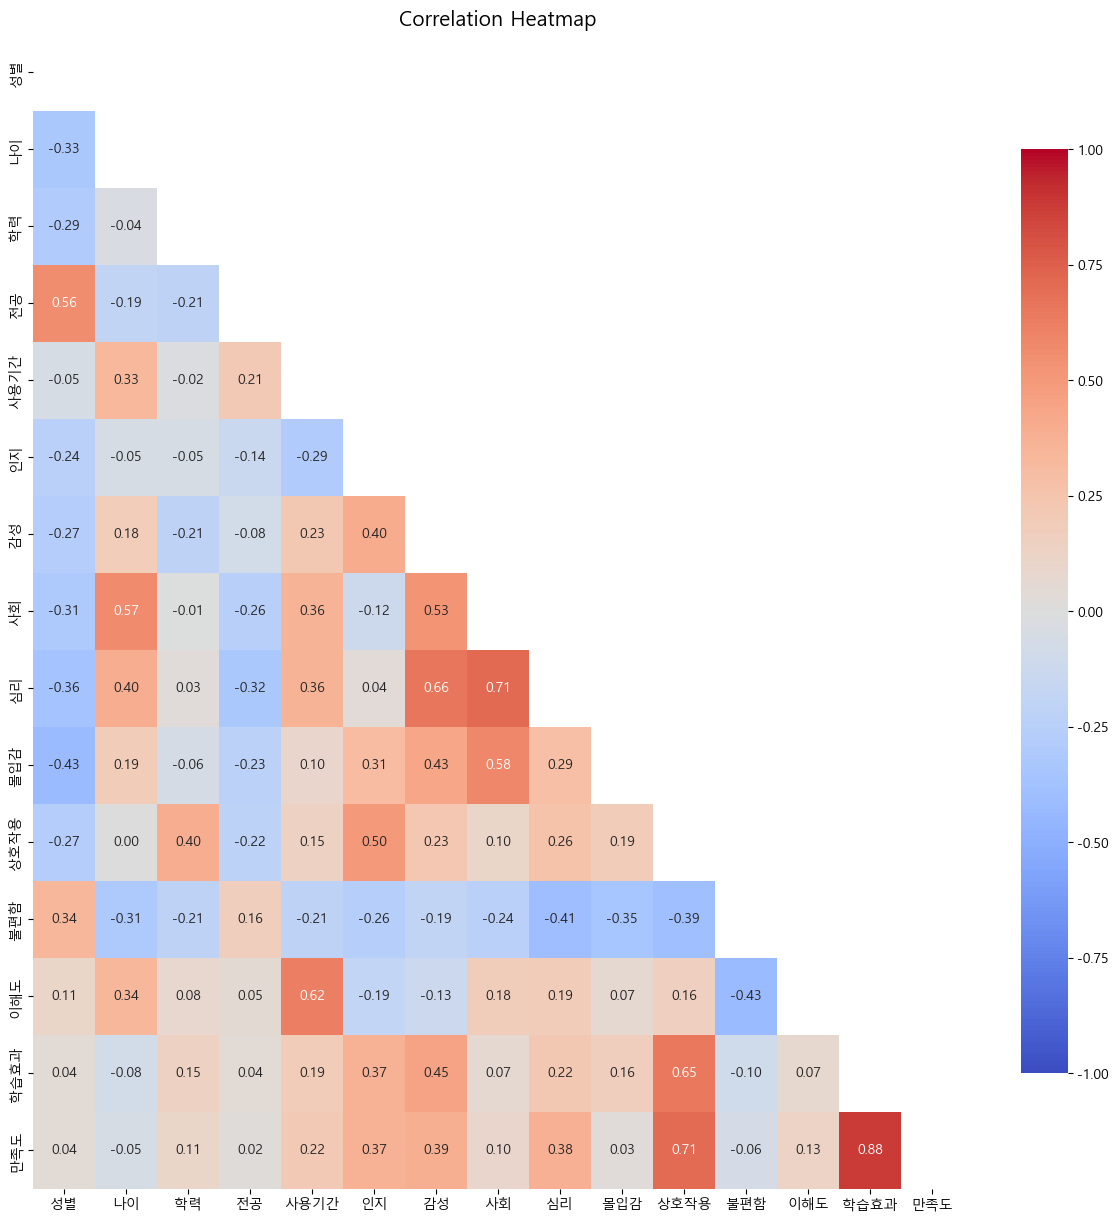

In [18]:
corr = cdf.corr()    #상관계수

#중복되는 위쪽 부분 없애려고 상삼각행렬 mask 생성
mask = np.triu(np.ones_like(corr, dtype=bool))   

plt.figure(figsize=(15,15))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, 
           fmt='.2f', vmin=-1, vmax=1, cbar_kws={'shrink':.8})
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

In [19]:
# 컴퓨터에 깔려 있는 폰트들 확인하기
import matplotlib.font_manager as fm
font_list = [f.name for f in fm.fontManager.ttflist]

han_fonts = [font_name for font_name in font_list if  'Gothic' in font_name]
print(han_fonts)

['Century Gothic', 'Malgun Gothic', 'Century Gothic', 'Copperplate Gothic Light', 'Franklin Gothic Medium', 'Century Gothic', 'Franklin Gothic Demi', 'Franklin Gothic Heavy', 'Franklin Gothic Demi Cond', 'Franklin Gothic Medium', 'Yu Gothic', 'Copperplate Gothic Bold', 'Franklin Gothic Demi Cond', 'Hancom Gothic', 'Yu Gothic', 'Franklin Gothic Book', 'Century Gothic', 'HYGothic-Medium', 'Franklin Gothic Medium', 'Malgun Gothic', 'Franklin Gothic Heavy', 'Hancom Gothic', 'Yu Gothic', 'HYGothic-Medium', 'Yu Gothic', 'HYGothic-Extra', 'Malgun Gothic', 'Century Gothic', 'Franklin Gothic Medium', 'Malgun Gothic', 'MS Gothic', 'Copperplate Gothic Bold', 'Hancom Gothic', 'Century Gothic', 'Franklin Gothic Demi', 'HYGothic-Extra', 'Showcard Gothic', 'Yu Gothic', 'Hancom Gothic', 'Franklin Gothic Book', 'Franklin Gothic Demi', 'Yu Gothic', 'Malgun Gothic', 'Copperplate Gothic Light', 'Franklin Gothic Heavy', 'Franklin Gothic Book', 'Franklin Gothic Medium Cond', 'Century Gothic', 'Franklin Goth

- 학습만족도/학습효과를 예측하는 모델을 만들거임
<br>만족도에 영향 -> 학습효과, 상호작용, 감성, 심리, 인지, 불편함(유일하게 마이너스 수치)
<br>학습효과에 영향 -> 상호작용, 감성, 인지, 심리

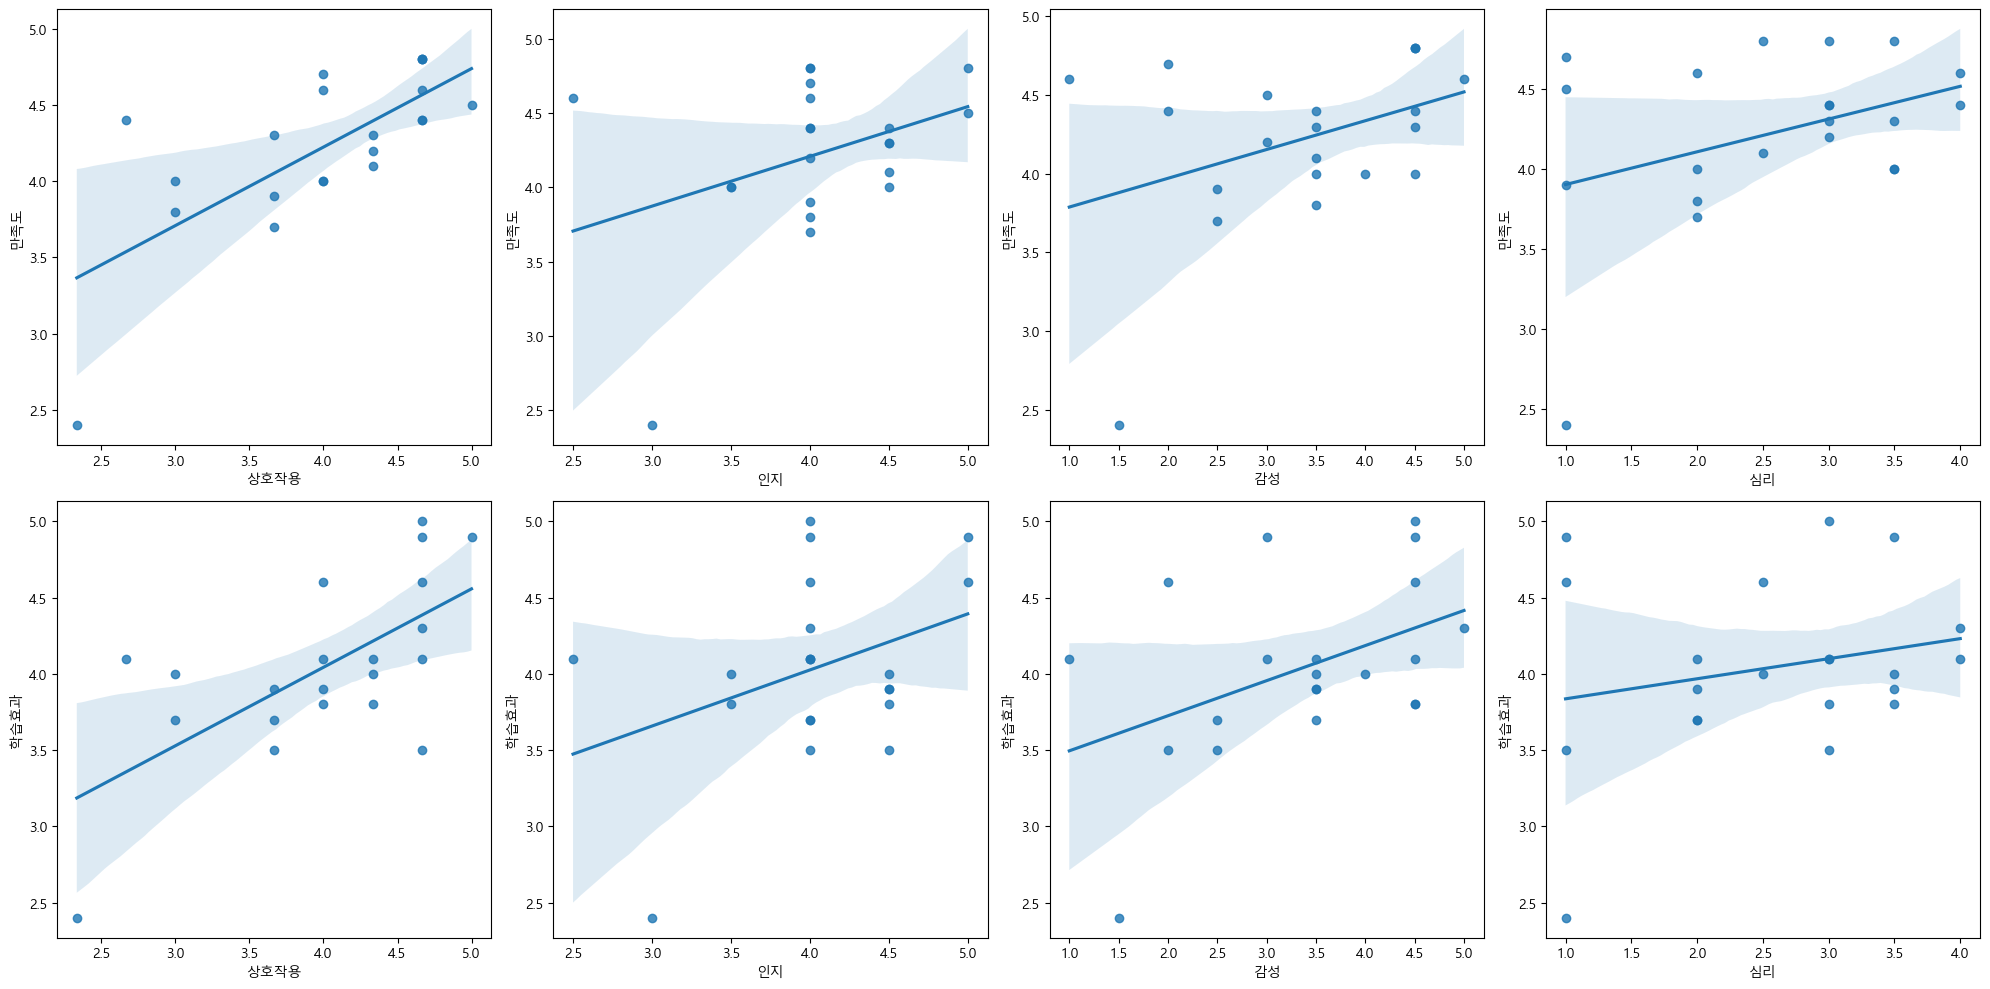

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

# 만족도
sns.regplot(data=cdf, x='상호작용', y='만족도', ax=axs[0,0])
sns.regplot(data=cdf, x='인지', y='만족도', ax=axs[0,1])
sns.regplot(data=cdf, x='감성', y='만족도', ax=axs[0,2])
sns.regplot(data=cdf, x='심리', y='만족도', ax=axs[0,3])

# 학습효과
sns.regplot(data=cdf, x='상호작용', y='학습효과', ax=axs[1,0])
sns.regplot(data=cdf, x='인지', y='학습효과', ax=axs[1,1])
sns.regplot(data=cdf, x='감성', y='학습효과', ax=axs[1,2])
sns.regplot(data=cdf, x='심리', y='학습효과', ax=axs[1,3])

plt.tight_layout()
plt.show()

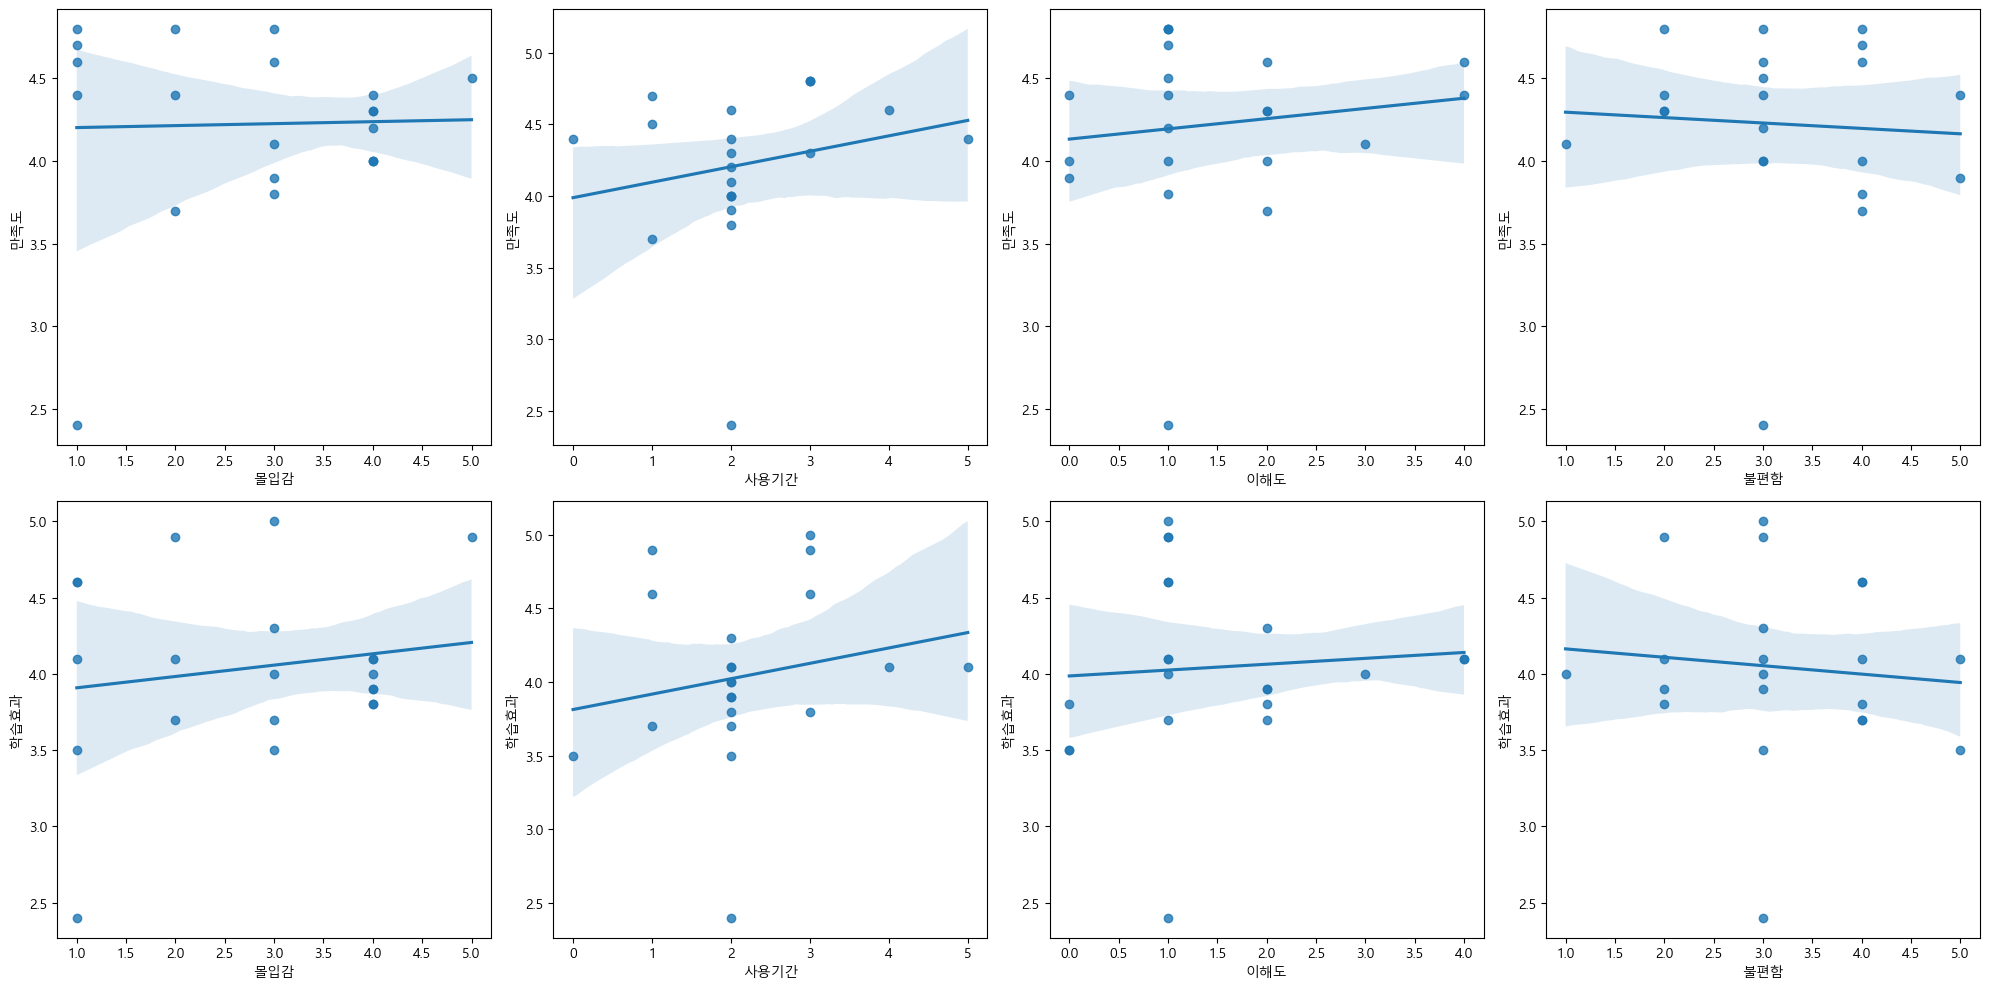

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

# 만족도
sns.regplot(data=cdf, x='몰입감', y='만족도', ax=axs[0,0])
sns.regplot(data=cdf, x='사용기간', y='만족도', ax=axs[0,1])
sns.regplot(data=cdf, x='이해도', y='만족도', ax=axs[0,2])
sns.regplot(data=cdf, x='불편함', y='만족도', ax=axs[0,3])

# 학습효과
sns.regplot(data=cdf, x='몰입감', y='학습효과', ax=axs[1,0])
sns.regplot(data=cdf, x='사용기간', y='학습효과', ax=axs[1,1])
sns.regplot(data=cdf, x='이해도', y='학습효과', ax=axs[1,2])
sns.regplot(data=cdf, x='불편함', y='학습효과', ax=axs[1,3])

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='학습효과', ylabel='Count'>

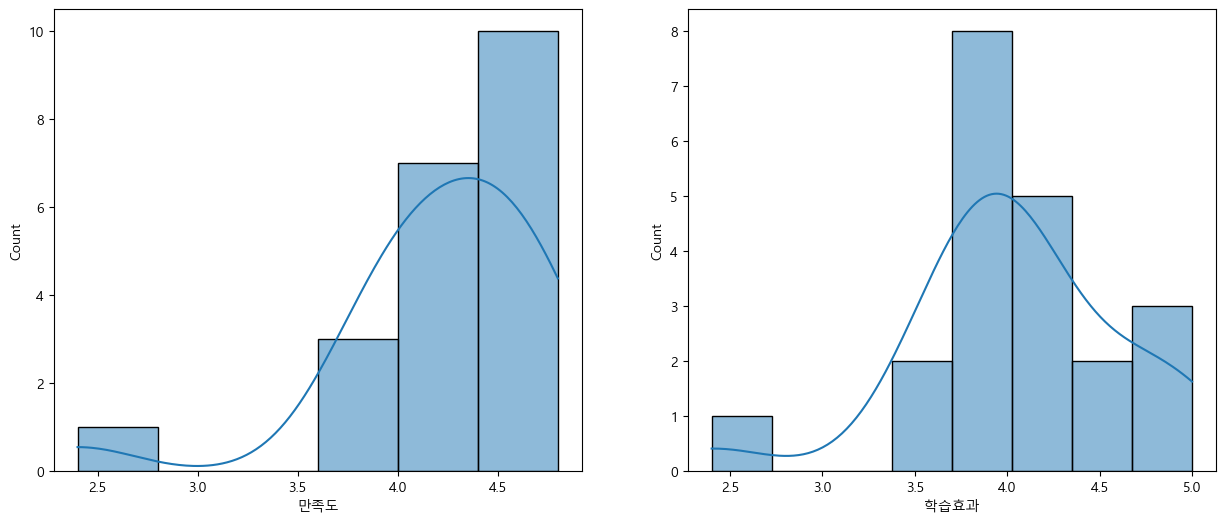

In [22]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

# 분포도 확인
sns.histplot(data=cdf, x='만족도', kde=True, ax=ax[0])
sns.histplot(data=cdf, x='학습효과', kde=True, ax=ax[1])

In [23]:
cdf.to_csv('cdf.csv', index=False)   #파일로 저장

cdf = pd.read_csv('cdf.csv')
cdf.head()

,성별,나이,학력,전공,사용기간,인지,감성,사회,심리,몰입감,상호작용,불편함,이해도,학습효과,만족도
0,0,0,2,0,1,5.0,3.0,1.0,1.0,5,5.000000,3.0,1,4.9,4.5
1,1,1,0,1,2,4.0,3.5,2.5,2.0,3,3.000000,4.0,1,3.7,3.8
2,1,0,2,2,1,4.0,2.0,1.0,1.0,1,4.000000,4.0,1,4.6,4.7
3,0,0,2,0,3,5.0,4.5,1.0,2.5,1,4.666667,4.0,1,4.6,4.8
4,1,0,1,2,2,4.0,4.5,1.5,3.0,2,2.666667,5.0,1,4.1,4.4


In [24]:
cdf1 = cdf[['인지','감성','심리','상호작용','불편함','만족도']]
cdf2 = cdf[['인지','감성','심리','상호작용','불편함','학습효과']]

In [25]:
cdf1.head()

,인지,감성,심리,상호작용,불편함,만족도
0,5.0,3.0,1.0,5.000000,3.0,4.5
1,4.0,3.5,2.0,3.000000,4.0,3.8
2,4.0,2.0,1.0,4.000000,4.0,4.7
3,5.0,4.5,2.5,4.666667,4.0,4.8
4,4.0,4.5,3.0,2.666667,5.0,4.4


In [26]:
# 만족도
xdf = cdf1.drop(['만족도'], axis=1)   #독립변수
ydf = cdf1['만족도']   #종속변수

# 데이터가 너무 작아서 8:2로 나누면 오차가 너무 큼(랜덤 돌릴 때마다 차이가 크게 남)
# -> 교차검증 수행해야 함
xtrain, xtest, ytrain, ytest = train_test_split(xdf, ydf, test_size=0.2)

# LinearRegression(선형회귀)로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(xtrain, ytrain)

ypred = lr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.3f}\nRMSE: {rmse:.3}')

MSE: 0.291
RMSE: 0.539


In [27]:
# 만족도: 교차검증(cross_val_score)
xdf = cdf1.drop(['만족도'], axis=1) 
ydf = cdf1['만족도']

neg_mse = cross_val_score(lr, xdf, ydf, scoring='neg_mean_squared_error', cv=5)
rmse_score = np.sqrt(-1*neg_mse)
avg_rmse = np.mean(rmse_score)

print(f'5개 폴드의 개별 Negative MSE scores: {np.round(neg_mse, 2)}')
print(f'5개 폴드의 개별 RMSE scores: {np.round(rmse_score, 2)}')
print(f'5개 폴드의 평균 RMSE: {avg_rmse:.3f}')

5개 폴드의 개별 Negative MSE scores: [-0.38 -0.1  -0.24 -0.44 -0.44]
5개 폴드의 개별 RMSE scores: [0.61 0.32 0.49 0.66 0.66]
5개 폴드의 평균 RMSE: 0.551


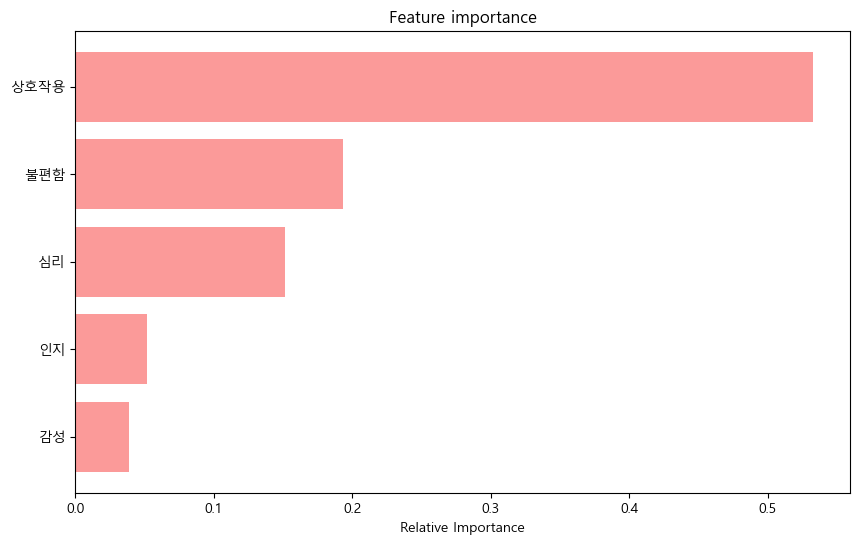

In [28]:
# 만족도: feature importance 시각화
lr.fit(xdf, ydf)

importance = np.abs(lr.coef_)
feature_names = xdf.columns
indices = np.argsort(importance)

plt.figure(figsize=(10,6))
plt.title('Feature importance')

plt.barh(range(len(indices)), importance[indices], color='#fb9a99', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [29]:
# 학습효과
xdf = cdf2.drop(['학습효과'], axis=1) 
ydf = cdf2['학습효과']

xtrain, xtest, ytrain, ytest = train_test_split(xdf, ydf, test_size=0.2)

lr = LinearRegression()
lr.fit(xtrain, ytrain)

ypred = lr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.3f}\nRMSE: {rmse:.3}')

MSE: 0.812
RMSE: 0.901


In [30]:
# 학습효과: 교차검증(cross_val_score)
xdf = cdf2.drop(['학습효과'], axis=1) 
ydf = cdf2['학습효과']

neg_mse = cross_val_score(lr, xdf, ydf, scoring='neg_mean_squared_error', cv=5)
rmse_score = np.sqrt(-1*neg_mse)
avg_rmse = np.mean(rmse_score)

print(f'5개 폴드의 개별 Negative MSE scores: {np.round(neg_mse, 2)}')
print(f'5개 폴드의 개별 RMSE scores: {np.round(rmse_score, 2)}')
print(f'5개 폴드의 평균 RMSE: {avg_rmse:.3f}')

5개 폴드의 개별 Negative MSE scores: [-0.52 -0.48 -0.28 -0.34 -0.6 ]
5개 폴드의 개별 RMSE scores: [0.72 0.69 0.53 0.59 0.78]
5개 폴드의 평균 RMSE: 0.661


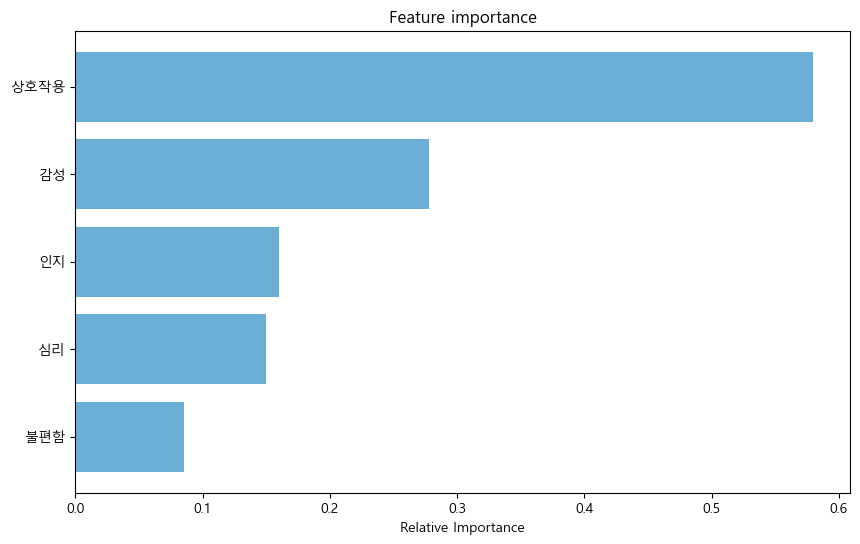

In [31]:
# 학습효과: feature importance 시각화
lr.fit(xdf, ydf)

importance = np.abs(lr.coef_)
feature_names = xdf.columns
indices = np.argsort(importance)

plt.figure(figsize=(10,6))
plt.title('Feature importance')

plt.barh(range(len(indices)), importance[indices], color='#6baed6', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 릿지, 라쏘, 엘라스틱넷으로 선형회귀 모델 생성 및 평가

In [32]:
# 알파값에 따른 회귀모델의 폴트평균 RMSE를 출력하고, 회귀 계수값을 DF로 반환
def get_linear_reg_eval(model_name, params=None, xdata=None, ytarget=None,
                       verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose: print(f'######## {model_name} ########')
    
    for i in params:
        if model_name=='Ridge': model = Ridge(alpha=i)
        elif model_name=='Lasso': model = Lasso(alpha=i)
        elif model_name=='ElasticNet': model = ElasticNet(alpha=i, l1_ratio=0.5)
            
        neg_mse = cross_val_score(model, xdata, ytarget, 
                        scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse))
        print(f'alpha가 {i}일때, 5폴드 세트의 평균 RMSE: {avg_rmse}')
        
        # corss_val_score는 evaluation metric만 반환하므로 모델을 재학습해 회귀계수 추출
        model.fit(xdata, ytarget)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=xdata.columns)
            colname = 'alpha'+str(i)
            coeff_df[colname] = coeff
    return coeff_df

In [33]:
# 릿지
alpha=[0.0, 0.05, 0.1, 0.5]
ridge_coeff = get_linear_reg_eval('Ridge', params=alpha, xdata=xdf, ytarget=ydf)
ridge_coeff

######## Ridge ########
alpha가 0.0일때, 5폴드 세트의 평균 RMSE: 0.6607820836236489
alpha가 0.05일때, 5폴드 세트의 평균 RMSE: 0.6576123214054528
alpha가 0.1일때, 5폴드 세트의 평균 RMSE: 0.6546428115445915
alpha가 0.5일때, 5폴드 세트의 평균 RMSE: 0.6362463643013913


,alpha0.0,alpha0.05,alpha0.1,alpha0.5
인지,-0.159958,-0.152999,-0.146354,-0.102460
감성,0.278131,0.274743,0.271499,0.249784
심리,-0.149843,-0.145984,-0.142292,-0.117644
상호작용,0.579842,0.574305,0.568930,0.530858
불편함,0.085410,0.085473,0.085501,0.084738


In [34]:
# 라쏘
alpha=[0.0, 0.05, 0.1, 0.5]
lasso_coeff = get_linear_reg_eval('Lasso', params=alpha, xdata=xdf, ytarget=ydf)
lasso_coeff

######## Lasso ########
alpha가 0.0일때, 5폴드 세트의 평균 RMSE: 0.6607820836236493
alpha가 0.05일때, 5폴드 세트의 평균 RMSE: 0.5459646524664273
alpha가 0.1일때, 5폴드 세트의 평균 RMSE: 0.5353672593073858
alpha가 0.5일때, 5폴드 세트의 평균 RMSE: 0.588905408140048


,alpha0.0,alpha0.05,alpha0.1,alpha0.5
인지,-0.159958,0.000000,0.000000,0.0
감성,0.278131,0.136415,0.104760,0.0
심리,-0.149843,-0.000000,-0.000000,0.0
상호작용,0.579842,0.388722,0.284549,0.0
불편함,0.085410,0.034279,0.000000,-0.0


In [35]:
# 엘라스틱넷
alpha=[0.0, 0.05, 0.1, 0.5]
elastic_coeff = get_linear_reg_eval('ElasticNet', params=alpha, xdata=xdf, ytarget=ydf)
elastic_coeff

######## ElasticNet ########
alpha가 0.0일때, 5폴드 세트의 평균 RMSE: 0.6607820836236493
alpha가 0.05일때, 5폴드 세트의 평균 RMSE: 0.5765106082887165
alpha가 0.1일때, 5폴드 세트의 평균 RMSE: 0.5489993812024665
alpha가 0.5일때, 5폴드 세트의 평균 RMSE: 0.5831888527362639


,alpha0.0,alpha0.05,alpha0.1,alpha0.5
인지,-0.159958,0.000000,0.000000,0.000000
감성,0.278131,0.164466,0.134620,0.017589
심리,-0.149843,-0.019666,-0.000000,0.000000
상호작용,0.579842,0.431617,0.348704,0.017509
불편함,0.085410,0.067745,0.021527,-0.000000
